### Titanic predict

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
test = pd.read_csv('./dataset/test.csv' , encoding = 'utf-8' ) #상대경로
test.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [5]:
train = pd.read_csv('./dataset/train.csv') 
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#변수
#survived : 0이면 사망 1이면 생존
#Pclass : 티켓 등급
#Embarked : 중간 경유지
#Cabin : 선실번호

In [7]:
#전체적인 정보 살피기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#연속형변수 살펴보기
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
#결측치 개수를 확인
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#결측치 처리
#Age 결측치 평균으로 대체
train['Age'].fillna(train['Age'].mean(), inplace = True)
#Cabin, Embarked "N"으로 대체
train['Cabin'].fillna("N", inplace = True)
train['Embarked'].fillna("N", inplace = True)

In [11]:
print(f'데이터 세트 null값 개수 : {train.isnull().sum()}') #전부 0임을 확인/ 결측치 없음

데이터 세트 null값 개수 : PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [12]:
#각 개수들을 볼 수 있음
print('성별 값 분포 :', train['Sex'].value_counts())
print('Cabin분포 :', train['Cabin'].value_counts())
print('Embarked 분포 : ',train['Embarked'].value_counts())

성별 값 분포 : male      577
female    314
Name: Sex, dtype: int64
Cabin분포 : N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
Embarked 분포 :  S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [13]:
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

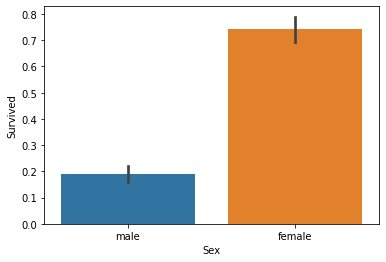

In [14]:
sns.barplot(x = 'Sex' , y = 'Survived', data = train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

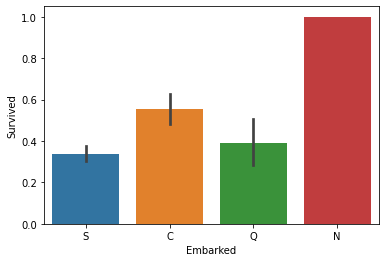

In [15]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)

In [16]:
from sklearn import preprocessing

def encode_features(dataDF) :
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

train = encode_features(train)
train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,146,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,146,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,146,3


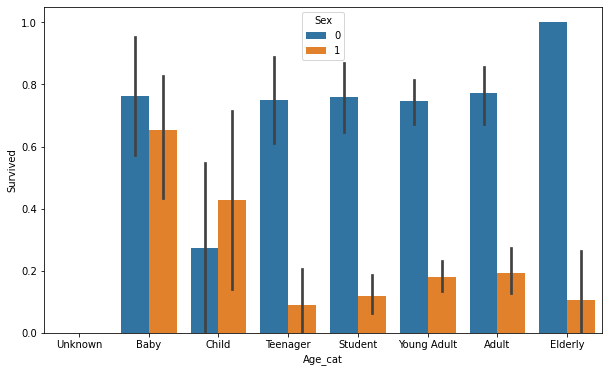

In [17]:
def get_category(age):
    cat=''
    if age <=-1 : cat="Unknown"
    elif age <=5 : cat="Baby"
    elif age <=12 : cat="Child"
    elif age <=18 : cat="Teenager"
    elif age <=25 : cat="Student"
    elif age <=35 : cat="Young Adult"
    elif age <=60 : cat="Adult"
    else : cat = "Elderly"
    
    return cat

plt.figure(figsize=(10,6))
group_names=["Unknown","Baby","Child","Teenager","Student","Young Adult","Adult","Elderly"]

train['Age_cat']=train['Age'].apply(lambda x : get_category(x)) #새로 열 추가
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=train, order=group_names)
train.drop('Age_cat',axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder

def fillna(df) :
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Age'].fillna(df['Age'].mean(), inplace = True)
    df['Age'].fillna(df['Age'].mean(), inplace = True)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [20]:

#원본 데이터를 다시 불러 label data인 Survived 속성만 별도로 분리해 클래스 결정값 dataset으로 만들고 
# Survived 속성은 drop 한다. 그리고 전처리 함수를 이용해 가공한 후 train_test_split() API를 이용해 전체 데이터의 20%를 테스트 dataset로 추출한다.

# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived'] #레이블
X_titanic_df= titanic_df.drop('Survived',axis=1) #feature값

X_titanic_df = transform_features(X_titanic_df)


In [21]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [23]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
333,3,1,16.0,2,0,18.0000,7,3
662,1,1,47.0,0,0,25.5875,4,3
382,3,1,32.0,0,0,7.9250,7,3
331,1,1,45.5,0,0,28.5000,2,3
149,2,1,42.0,0,0,13.0000,7,3
...,...,...,...,...,...,...,...,...
269,1,0,35.0,0,0,135.6333,2,3
337,1,0,41.0,0,0,134.5000,4,0
91,3,1,20.0,0,0,7.8542,7,3
80,3,1,22.0,0,0,9.0000,7,3


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8492


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
#결정 트리 모델로 교차 검증을 해보겠다. 
# 교차 검증을 위해 사이킷런의 model_selection 패키지의 KFold 클래스, cross_val_score(), GridSearchCV 
# 클래스를 5개의 fold로 설정하여 사용해 볼 것이다.

#enumerate : 인덱스와 원소를 동시에 접근해서 for문

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f"교차검증 {iter_count} 정확도 : {accuracy : .4f}")    

    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print(f"평균 정확도 : {mean_score:.4f}") 
# exec_kfold 호출
print('\n ### KFold 클래스 ###  \n')
exec_kfold(dt_clf , folds=5) 

print('\n ### StratifiedKFold 클래스 ###  \n')
scores = cross_val_score(dt_clf, X_titanic_df , y_titanic_df , cv=5)
for iter_count,accuracy in enumerate(scores):
    print(f"교차검증 {iter_count} 정확도 : {accuracy:.4f}")
print(f"평균 정확도 : {np.mean(scores):.4f}")

#mean_score = np.mean(scores)
#print(f"평균 정확도 : {mean_score:.4f}")




 ### KFold 클래스 ###  

교차검증 0 정확도 :  0.7542
교차검증 1 정확도 :  0.7809
교차검증 2 정확도 :  0.7865
교차검증 3 정확도 :  0.7697
교차검증 4 정확도 :  0.8202
평균 정확도 : 0.7823

 ### StratifiedKFold 클래스 ###  

교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [26]:
# 인덱스 번호와 train, test 출력됨을 알 수 있음
# from sklearn.model_selection import KFold
# kfold = KFold(n_splits=5) 

# for i in enumerate(kfold.split(X_titanic_df)) :
#     print(i)

In [27]:
# 코드 간단히 split 대신 cv로 k-fold

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf , X_titanic_df , y_titanic_df, cv = 5)
for iter_count,accuracy in enumerate(scores):
    print(f"교차검증 {iter_count} 정확도 : {accuracy:.4f}")
print(f"평균 정확도 : {np.mean(scores):.4f}")



교차검증 0 정확도 : 0.7430
교차검증 1 정확도 : 0.7753
교차검증 2 정확도 : 0.7921
교차검증 3 정확도 : 0.7865
교차검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


In [28]:
#GridSearchCV
#decision tree 에서의 파라미터 최적 찾기 알고리즘

from sklearn.model_selection import GridSearchCV
parameters = {"max_depth" : [2, 3, 5, 10],
              "min_samples_split" : [2, 3, 5],
              "min_samples_leaf" : [1, 5, 8]}
grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring="accuracy", cv=5)
grid_dclf.fit(X_train, y_train)
print(f"GridSearchCV 최적 하이퍼 파라미터 : {grid_dclf.best_params_}")
print(f"GridSearchCV 최고 정확도 : {grid_dclf.best_score_:.4f}")
best_dclf = grid_dclf.best_estimator_
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print(f"테스트 세트에서의 DecisionTreeClassifier 정확도 : {accuracy:.4f}")


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도 : 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


In [29]:
#정밀도와 재현율

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('./dataset/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df , y_titanic_df , 
test_size = 0.2 , random_state=11)

from sklearn.metrics import accuracy_score , precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred) #정확도
    precision = precision_score(y_test, pred) #정밀도 
    recall = recall_score(y_test, pred) #재현율

    print('오차행렬')
    print(confusion)
    print(f"정확도 :{ accuracy:.4f} , 정밀도 :{ precision:.4f} , 재현율 :{recall:.4f}" )


lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)


오차행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492 , 정밀도 :0.7742 , 재현율 :0.7869


C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
## 분류 결정 임곗값에 따른 positive 예측 확률 변화


pred_proba = lr_clf.predict_proba(X_test) #X_test를 로지스틱 회귀를 하겠다.
pred = lr_clf.predict(X_test)

print(f'pred_probaa()결과 shape : {pred_proba.shape}')
print(f'pred_proba arrary 에서 앞 3개만 샘플로 추출 : {pred_proba[:3]}')
#생존이 0 사망이 1 로 클래스가 두개로 확률값이 두개 출력되고
# 이중에서 높은 값이 생존/사망을 결정

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
print('두개의 clss중에서 더 큰 확률을 클래스 값으로 예측 : {pred_proba_result[:3]}')


pred_probaa()결과 shape : (179, 2)
pred_proba arrary 에서 앞 3개만 샘플로 추출 : [[0.46172445 0.53827555]
 [0.87862224 0.12137776]
 [0.87724968 0.12275032]]
두개의 clss중에서 더 큰 확률을 클래스 값으로 예측 : {pred_proba_result[:3]}


In [31]:
from sklearn.preprocessing import Binarizer

#Binarizer 의 threshold 설정값, 분류 결정 임계값임
custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

Binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_1)
custom_predict = Binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492 , 정밀도 :0.7742 , 재현율 :0.7869


In [45]:
#테스트를 수행할 모든 임곗값을 리스트 객체로 저장
from sklearn.preprocessing import Binarizer
thresholds = [0.4, 0.45 , 0.5 , 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1 , thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:' ,custom_threshold)
        get_clf_eval(y_test , custom_predict)



In [46]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차행렬
[[99 19]
 [10 51]]
정확도 :0.8380 , 정밀도 :0.7286 , 재현율 :0.8361
임곗값: 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 :0.8492 , 정밀도 :0.7656 , 재현율 :0.8033
임곗값: 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492 , 정밀도 :0.7742 , 재현율 :0.7869
임곗값: 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 :0.8659 , 정밀도 :0.8364 , 재현율 :0.7541
임곗값: 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 :0.8771 , 정밀도 :0.8824 , 재현율 :0.7377


In [38]:
y_test

431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64

In [60]:
#precision_recall_curve()를 이용하여 임곗값에 따른 정밀도 - 재현율 값 추출
from sklearn.metrics import precision_recall_curve

#레이블 값이 1일때의 예측 확률을 추출 - 사망 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

#실제값 데이터 셋과 레이블 값이 1일때의 예측 확률을 precision_recall_curve 인자로 입력
precsions, recalls, thresholds = precision_recall_curve(y_test  , pred_proba_class1)
print('반환된 종류 결정 임곗값 배열의 shape :', thresholds.shape)
print('반환된 precsions  배열의 shape : ' , precsions.shape)
print('반환된 recalls 배열의 Shape :', recalls.shape)

print('threshold 5 sample' ,thresholds[:5]) #print(f'threshold 5 sample : {thresholds[:5]}')
print("precsions 5 sample:" , precsions[:5])
print("recalls 5 sample:" , recalls[:5])

#반환된 인덱스 값 배열 로우가 147건 이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.


반환된 종류 결정 임곗값 배열의 shape : (143,)
반환된 precsions  배열의 shape :  (144,)
반환된 recalls 배열의 Shape : (144,)
threshold 5 sample [0.10394577 0.10394795 0.10397243 0.10746376 0.10892659]
precsions 5 sample: [0.38853503 0.38461538 0.38709677 0.38961039 0.38562092]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.96721311]


In [59]:
print(f'threshold 5 sample : {thresholds[:5]}')


threshold 5 sample : [0.10394577 0.10394795 0.10397243 0.10746376 0.10892659]
